# COGS 118B - Final Project

# Names


- Minju Lee
- Cynthia Delira
- Ke
- Kevin Su

# Abstract 
Current music recommendation algorithms only offer users vague genres such as pop, rock, or indie. These genres include many different subgenres that are unique from one another which users are left unaware of because algorithms leave them out. We propose incorporating these subgenres and creating a machine learning structure that separates music by subgenres to give users more specific suggestions.

We will be using the Spotify Track Dataset from Kaggle and extract all pop-related songs’ dataset for clustering. Each data will represent a certain aspect of the song such as tempo, energy level, danceability, etc. Since most songs are already labeled with a subgenre of pop that are only based on the origin of the music, we will manual evualation as the main method of measurement for our algorithm. 

# Background

There are multiple music genre algorithms that exist, however none of them correctly classify music into sub-genres. Even the biggest music algorithm Spotify struggles with this as it is unable “to accurately gauge mood and context” <a name="mys"></a>[<sup>[2]</sup>](#mystery) which is crucial to identifying sub-genres. The issue with Spotify is that it utilizes K-Means clustering which requires previous knowledge of the number of clusters to create, making it difficult for the algorithm to identify sub-genres <a name="stern"></a>[<sup>[1]</sup>](#sternNote). Without sub-genres, algorithms cluster music into large, vague groups and end up recommending popular songs/artists instead of niche, underrated music <a name="mys"></a>[<sup>[2]</sup>](#mystery). Classifying music into sub-genres is important as it allows the user to find a wider variety of music and breaks them out of an echo chamber of the same type of music that everyone listens to <a name="mys"></a>[<sup>[2]</sup>](#mystery). 
Instead of K-Means clustering, we propose to use hierarchical clustering which is a “bottom-up” approach that initializes each observation as its own cluster and merged clusters move up the hierarchy. This approach requires no previous knowledge of the cluster count which allows us to evaluate sub-genres and the closeness of any two genres <a name="mys"></a>[<sup>[2]</sup>](#mystery). Our method will separate the giant genre of pop music into sub-genres based on tempo, energy level, danceability, etc. from the dataset we found. 

# Problem Statement

Given the complexity of genres, many songs are thrown into vague genres such as pop, rock, country, etc. when two songs from the same genre can have completely different sounds. This is a problem in most current music recommendation systems where thousands of songs are placed in this vague genre and the result leads to songs that are complete opposites to a person’s music taste. Therefore we want to train a model that will cluster songs from a one vague genre into multiple subgenres depending on each song’s tempo, energy level, danceability, etc in order to ensure a person is recommended songs that are similar to each other and not polar opposites.

# Data

We will be using the Spotify Tracks dataset as found on Kaggle. This dataset has a total of 20 variables with an approximate of 114k observations. The observations consist of different features of each song in the data. These features are the variables that include instrumental details on the songs like tempo, acousticness, instrumentalness. The tempo is considered a critical variable as it tracks the beats per minute(BPM) and is important when clustering songs that have similar tempo as well as danceability. Danceability gives a rating from 0.0(least danceable) to 1.0(most danceable) where a song’s tempo, rhythmic stability, beat strength, and overall regularity are used to determine how suitable the song is for a dance setting. This is a critical variable as one does not want to listen to a song with no danceability and then jumbo to one of the most danceable songs with a fast tempo. Other variables like loudness, valence, and danceability are important to take into account as it shows all the different characteristics of the song. 

To better handle the data we will clean the data in order to only cluster songs in a specific genre which is pop and we will do this by removing any song which its sub genre does not include the phrase “pop” which we can then assume the genre is an entirely different genre other than pop. By doing so we are reducing the number of data and also reducing all the different 125 genres that are in the dataset. Despite this cleaning, since the dataset is large we will still have sufficient data to work with.

Data Source: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset


# Proposed Solution


To further classify the sub-genre of a genre of music, which in this case is “pop”,  we will utilize the dataset on songs from Kaggle that were extracted through the Spotify API. Since some variables such as song length are not as representative as other features such as BPM, it’s important to select the most indicative variables during the data cleaning process. Because the dataset has a total of 20 variables, we will first visualize each variables with a histogram to spot any outliers or any varaible that doesn't make sense to inlcude in the algorithm. We then proceed with dimensionality reduction and fit the DR method that fits each cluster algorithm the best. We will use K-means clustering as our benchmark model as it’s the most common way of clustering and vector quantization. We will use the silhouette score from scikit-learn for model performance. For most optimal algorithm selection, we will search through Gaussian mixture model clustering, hierarchical clustering, and spectral clustering for the best performance model based on our evaluation metrics that is described below and compare it to K-means clustering. The optimal algorithm should efficiently cluster songs into different genres due to the variety and the volume of our datasets. We will utilize all the clustering algorithms described above from scikit-learn library. We will manually test the solution by randomly selecting songs from the same cluster to spot the similarity and selectings songs from different clusters to spot the difference.


# Evaluation Metrics

Due to the fact that all our results don’t have pre-existing labels, the evaluation metrics will largely depend on manual evaluation. To determine and quantify the performance of the clustering algorithm, among the four group members we have, each member will follow the same evaluation metrics. We will select two songs from each cluster group and rate it from 0 to 10 where 0 represents no similarity at all and 10 represents extremely similar. We are going to repeat this process three times for each cluster (ex: if there are 3 clusters, this process will be repeated 9 times with 9 scores). We will remove the highest and the lowest score, and take the average of the rest of the scores. Then we will select two clusters and one song from each cluster. We will rate it from 0 to 10 where 0 represents extremely similar and 10 represents extremely different. Keep repeating this process until all clusters have been compared with each other(ex: if there are 4 clusters, the process should be repeated 3! times). We will remove the highest and the lowest score, and take average for the rest of the scores, hence each team member should come out with two scores. Lastly, we will take the average of all 10 scores we have evaluated to represent the performance of the clustering algorithm. 

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



We are importing the important packages we need for our data clustering algorithm.

In [13]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format='retina'
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
pal = sns.color_palette("hls", 10)

# Dimension reduction and clustering tools
import sklearn.cluster as cluster
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import preprocessing


# Data loading
from sklearn.datasets import fetch_openml

# Metrics for how good a clustering does
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, classification_report
from sklearn.datasets import load_digits
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.cluster import KMeans

from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse


from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.cluster.hierarchy import fcluster
from sklearn.mixture import GaussianMixture

### 1. Data processing and visulization + Feature Selections

We are uploading our data into a dataframe called 'df' and then displaying it so we can see what is in our dataset.

In [7]:
df = pd.read_csv("dataset.csv")
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Then, we remove the unnecessary columns that include categorical or text data that cannot be used in our clustering algorithms. We also scan our dataframe for 'pop' in the 'track_genre' so we will only work with pop music. We assign all data points with pop as their genre to the dataframe df_pop.

In [8]:
# dropping irrelevant columns
df = df.drop(columns=['Unnamed: 0','track_id','artists','popularity','duration_ms','explicit', 'mode', 'time_signature'])

# finding songs from the pop genre
df_pop = df[df['track_genre'].str.contains('pop')]

# creating a new index with just the album and track name so we can view them later
df_pop_idx = df_pop[['album_name','track_name']]
df_pop_idx = df_pop_idx.reset_index(drop=True)

# removing album and track name from our pop dataframe
df_pop = df_pop.drop(columns=['album_name','track_name'])
df_pop = df_pop.drop(columns=['track_genre'])
df_pop = df_pop.reset_index(drop=True)
df_pop.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.576,0.505,11,-13.070,0.0392,0.753,0.199000,0.151,0.570,127.025
1,0.577,0.228,11,-14.684,0.0306,0.834,0.000805,0.384,0.161,119.035
2,0.641,0.479,4,-15.395,0.0443,0.732,0.059800,0.115,0.301,121.974
3,0.613,0.210,5,-15.309,0.0309,0.769,0.000477,0.139,0.268,132.035
4,0.646,0.370,0,-10.980,0.0351,0.825,0.000005,0.090,0.465,129.914


Next, we created histograms for each column in our 'df_pop' dataframe so we can visualize our data. We see that most of the columns are skewed in some way and only a few are approximately normal.

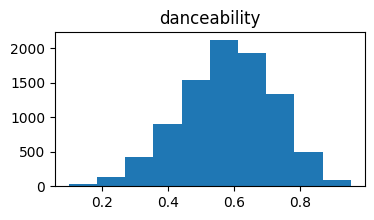

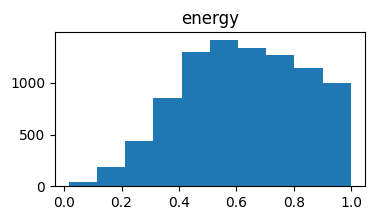

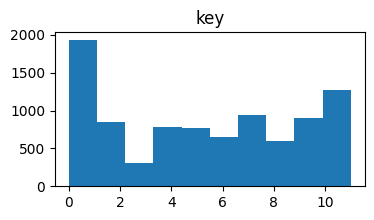

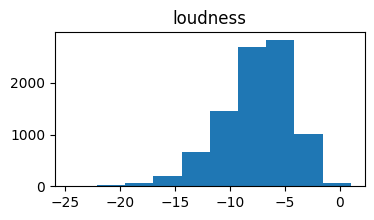

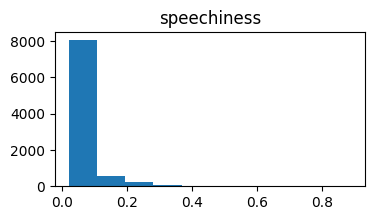

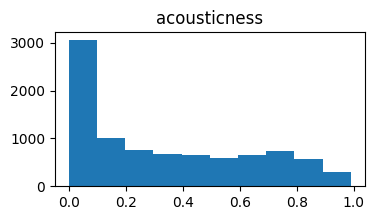

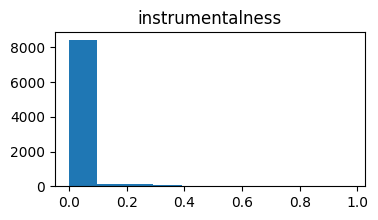

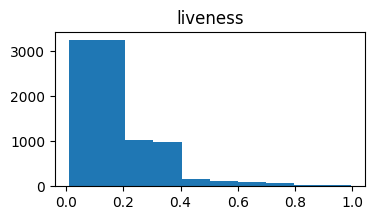

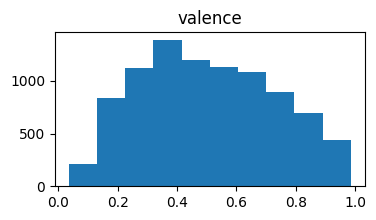

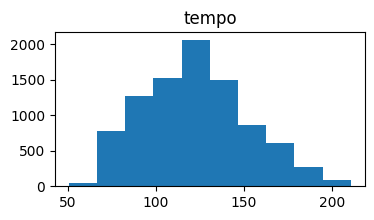

In [9]:
# plotting histograms for all columns in df_pop
for variable in df_pop:
    fig = plt.figure(figsize =(4, 2))
    plt.hist(df_pop[variable])
    plt.title(variable)
    plt.show()

We created an PCA elbow graph to see the best number of principle components to use for our PCA. We will need to reduce the dimensions of our dataframe so we can use K-means clustering on it, otherwise there will be too many dimensions for K-means to work.

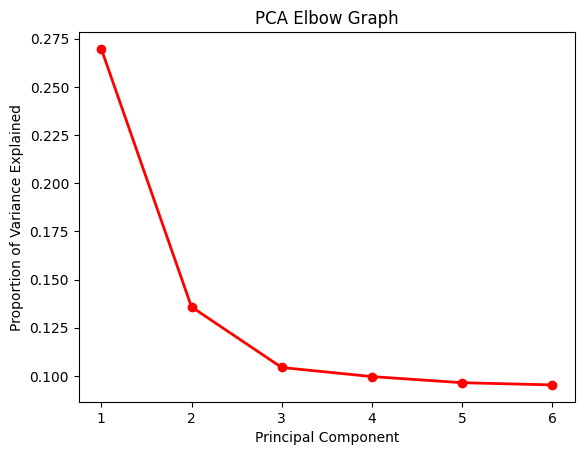

In [10]:
# normalizing the dataframe
normalized_df=(df_pop-df_pop.mean())/df_pop.std()

# using PCA from sklearn to plot the elbow graph
pca = PCA(n_components=6)
pcs = pca.fit_transform(normalized_df)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('PCA Elbow Graph')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

We can see above that the best number of principle components is at 3 based on the graph. Therefore, we will be using 3 PCs from now on.

### Benchmark Model: KMeans Clustering

Now, we are going to plot our K-means graph after using PCA but first we need to find the best number of clusters to use. To do that, we will plot the elbow graph for our K-means first and see where the graph creates an elbow point.

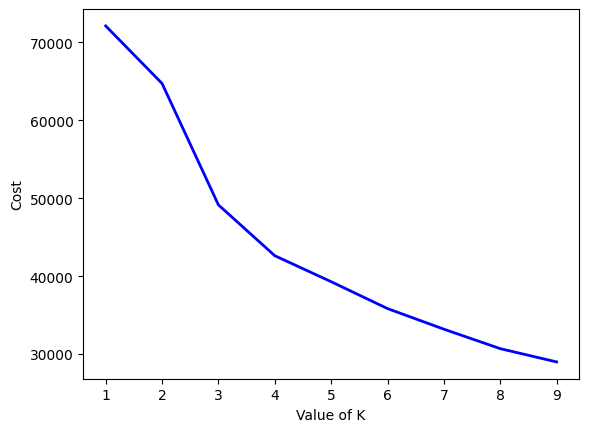

In [11]:
# using KMeans from sklearn to create an elbow graph
cost =[]
for i in range(1, 10):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(pcs)
    cost.append(KM.inertia_)     
 
# plotting the elbow graph
plt.plot(range(1, 10), cost, color ='b', linewidth ='2')
plt.xlabel("Value of K")
plt.ylabel("Cost")
plt.show() # clear the plot

Based on the elbow graph above, it is difficult to determining how many clusters we should use for our K-means clustering which indicates that PCA may not be the best dimensionality reduction tool to use. Luckily, we have another tool we can use instead: tsne.

In [14]:
# using TSNE from sklearn to perform dimensionality reduction on our original dataframe
tsne_perp_5 = TSNE(n_components=2, perplexity=5, random_state=99)
tcs = tsne_perp_5.fit_transform(normalized_df)
tcs = pd.DataFrame(tcs,columns=['c1','c2'])

We will re-graph our elbow graph after using tsne instead of PCA now.

/Users/kevinsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kevinsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kevinsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kevinsu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

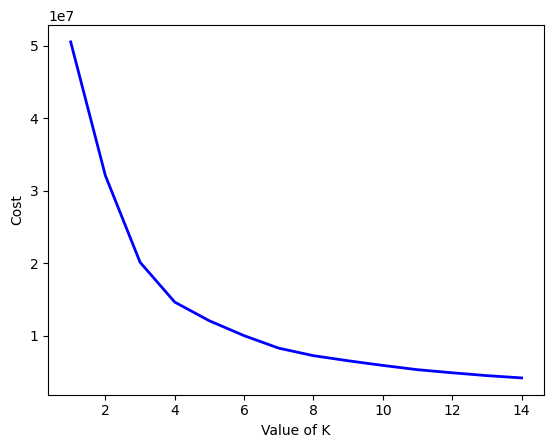

In [167]:
# using KMeans from sklearn to create an elbow graph
cost =[]
for i in range(1, 15):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(tcs)
    cost.append(KM.inertia_)     

# replotting our elbow graph after using tsne instead
plt.plot(range(1, 15), cost, color ='b', linewidth ='2')
plt.xlabel("Value of K")
plt.ylabel("Cost")
plt.show() # clear the plot

There is a clear point where our graph sharply stops decreasing at an exponential rate at 4. We will be using 4 clusters for our K-means now that we have used a better dimensionality reduction.

In [15]:
# using KMeans from sklearn to create 4 clusters
kmeans = KMeans(n_clusters=4)
label=kmeans.fit_predict(tcs)

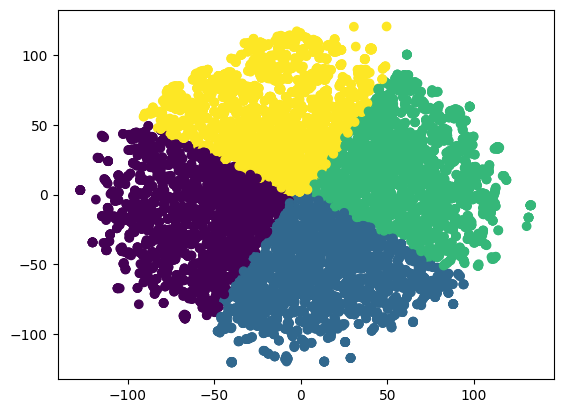

In [16]:
# plotting K-means of PCA
plt.scatter(tcs['c1'], tcs['c2'], c=label)

Now we can use our dataframe 'df_pop_indx' from earlier to find the album and track name of the songs in each cluster so it is easier for us to analyze how our songs are clustered.

In [17]:
# creating a new dataframe from our original 'df_pop_idx;
df_km = df_pop_idx

# creating a new column called 'Cluster' so we can find which song belongs to which cluster
df_km['Cluster'] = label.tolist()
df_km.head()

,album_name,track_name,Cluster
0,SABINA之淚,每次你走的時分,3
1,SABINA之淚,下了兩天雨,2
2,SABINA之淚,詩歌舞街,2
3,那陣時不知道,那陣時不知道,2
4,準備中,無條件,2


In [18]:
# exporting that list as a csv file for easier use
df_km.to_csv('k_means_result.csv')

Our K-means clustering appears to have been successful from the graph however, when we look at the songs in each cluster, we can see that the clusters are largely based on language rather than elements of the song such as danceability or instrumentals. This is because K-means needs an initial centroid first in order to form clusters. It iteratively finds the distance between a point and the initial centroid and keeps re-plotting the centroids until they are all positioned at the nearest spot for all the data points. Therefore, in order to accurately use K-means to cluster sub-genres, we would need previous knowledge of the cluster count and the dataset which is not possible with our research purposes. Thus, we need to explore other types of clustering algorithms to find the best sub-genre clustering algorithm.

### Hierarchical Clustering

In [172]:
def all_linkages(data):

    tree_sing = linkage(data,method='single')
    tree_cplt = linkage(data,method='complete')
    tree_avrg = linkage(data,method='average')
    tree_ward = linkage(data,method='ward')

    fig, axs = plt.subplots(2,2, figsize=(12,12))

    dendrogram(tree_sing, ax=axs[0,0])
    axs[0,0].set_title('Single linkage')
    xlim = axs[0,0].get_xlim()
    axs[0,0].set_yticks([])
    axs[0,0].set_xticks([])
    axs[0,0].set_xlim(xlim)


    dendrogram(tree_cplt, ax=axs[0,1])
    axs[0,1].set_title('Complete linkage')
    axs[0,1].set_yticks([])
    axs[0,1].set_xticks([])

    dendrogram(tree_avrg, ax=axs[1,0])
    axs[1,0].set_title('Average linkage')
    axs[1,0].set_yticks([])
    axs[1,0].set_xticks([])

    dendrogram(tree_ward, ax=axs[1,1])
    axs[1,1].set_title('Ward linkage');
    axs[1,1].set_yticks([])
    axs[1,1].set_xticks([])

    sns.despine(left=True, bottom=True)
    
    return tree_sing, tree_cplt, tree_avrg, tree_ward

RecursionError: maximum recursion depth exceeded while calling a Python object

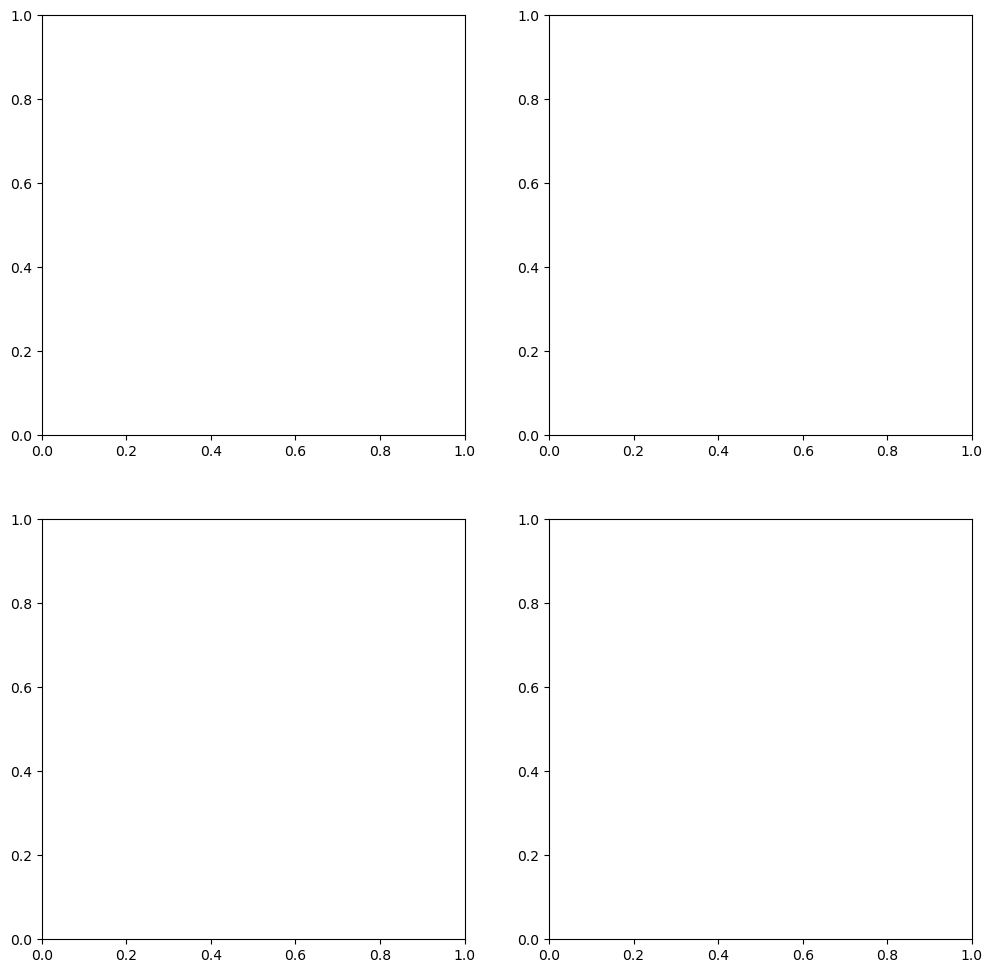

In [173]:
tree_sing, tree_cplt, tree_avrg, tree_ward = all_linkages(pcs)

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))

dendrogram(tree_ward, ax=ax);
sns.despine(left=True,bottom=True)

In [ ]:
clust = fcluster(tree_ward, criterion='distance', t=100) 
df_hierarchical = df_pop_idx
df_hierarchical['Cluster'] = clust.tolist()
df_hierarchical.head()

In [ ]:
df_hierarchical.to_csv('hierachical_result.csv')

# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

 Our research has explored many sub-genres of pop music however it is limited to only pop music. Our algorithm has only been trained with pop music so it would probably not fare well with other genres of music. It is easier to cluster data from one genre into multiple sub-genres because the data all belong under one category and mistakes are easier to fix. On the other hand, if we had clustered multiple genres into sub-genres, we would have a harder time differentiating the data and finding errors. If we had more time, we would have processed data from genres other than pop and train our algorithms to cluster multiple types of genres at once so it can be applied in real-world situations. For now, our study is only applicable to pop music and needs to be worked on more before we can release it to the world.

### Ethics & Privacy

The main goal of our project is to re-discover and make better classification of music genres for listeners having better experience. While we also seriously consider ethical and privacy aspects in our project.
1. Data privacy & consent: Since we use related data from Spotify. It may include sensitive musician and user information. We will make sure that all data is anonymous and used in compliance with data privacy and follows data protection laws, respecting both artist and listener privacy.
2. Bias and representation: Music data may also have bias(cultural, language, geographical position reasons, etc) We know that initial dataset may not represent all music genres equitably (particularly those from underrepresented regions or languages).We will minimize and mitigate such biases,  try our best to make a diversified and inclusive music environment.
3. Generalization and Impact: our project dataset is limited, but we want to seek methods to generalize the results in various music genres. We will pay attention to avoid overgeneralization which may misrepresent some music styles, working towards recommendations that benefit a broad spectrum of listeners and musicians.
4. Transparency and accountability: considering ethical research practices, we promise that our methodologies, data sources, and findings are all transparent. 

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="sternNote"></a>1.[^](#stern): Stern, Samuel Walter, "Analysis of Music Genre Clustering Algorithms" (2021). Theses and Dissertations. 2839. https://dc.uwm.edu/cgi/viewcontent.cgi?article=3844&context=etd <br> 
<a name="mystery"></a>2.[^](#mys): Uncovering the Mystery: Why is Spotify's Algorithm Failing to Impress?, 
locall.host/why-is-spotify-algorithm-so-bad/.
<br>

